In [1]:
##If you are using google colab then run this cell
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## importing libraries
import pandas as pd
import re
import nltk
import collections
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
##importing data and visualizing top 5 rows
df=pd.read_csv('/content/drive/MyDrive/NLP projects/Spam and ham sms/spam.csv',encoding="ISO-8859-1")
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


We can observe there are extra 3 columns present in the dataset.The column names are also not specified correctly.

In [4]:
## dropping extra columns
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
## renameing the columns names
df=df.rename(columns = {'v1':'target','v2':'sms'})
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
## extracting description about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


So there is no missing data 

In [6]:
## To see maximum length of sms in the data
print('maximum length pf sms is',df.sms.str.len().max())

maximum length pf sms is 910


In [7]:
## To check if the dataset is balanced or not
df.target.value_counts()/5572

ham     0.865937
spam    0.134063
Name: target, dtype: float64

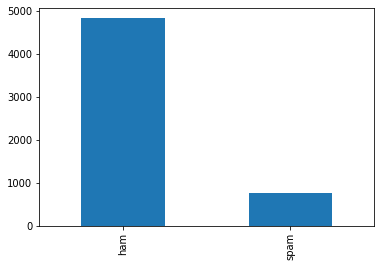

In [8]:
##Visualizing counts.
df.target.value_counts().plot(kind='bar')

The dataset is imbalanced.

## Text cleaning

In [9]:
#user defined function used to cleaning the sms column
def text_cleaning(text):
  text = re.sub("@(\w+)", ' ', text)
  text = re.sub("http\S+", ' ', text)
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = text.lower()
  text = text.split()
  ps = PorterStemmer()
  
  # stemming
  text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  text = ' '.join(text)
  return text

In [10]:
## Applied text cleaning user defined function on balanced data
df['sms']=df['sms'].apply(lambda x: text_cleaning(x) )
df.head()

,target,sms
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [11]:
# Converting ham:1 and spam:0 
df['target']=df['target'].apply(lambda x: 1 if x=='ham' else 0)

In [12]:
## train test split using stratified random sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms'],
                               df['target'],stratify=df['target'], random_state=0
)

## Model building:
Created pipeline it contains
1. tfidf : convert text to numeric
2. SMOTE : To handle imbalanced data
3. classifer

In [13]:
## multinomial distribution
textclassifier1 =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=12)),
   ('mnb', MultinomialNB(alpha =0.1))
])

In [14]:
## fitting data and predicting on test data
textclassifier1.fit(X_train, y_train)
pred=textclassifier1.predict(X_test)

In [15]:
## Observing the frequncy of both classes in test
actual_freq=collections.Counter(y_test)
pred_freq = collections.Counter(pred)

# printing the frequency
print('frequency of actual values',dict(actual_freq))
print('frequency of predicted values',dict(pred_freq))

frequency of actual values {1: 1206, 0: 187}
frequency of predicted values {1: 1174, 0: 219}


In [16]:
cm = confusion_matrix(y_test,pred)
print('*********************Multinomial Distribution***************************')
print(cm)
print('Precision: %.3f' % precision_score(y_test, pred))
print('Recall: %.3f' % recall_score(y_test, pred))
print('Accuracy: %.3f' % accuracy_score(y_test, pred))

*********************Multinomial Distribution***************************
[[ 180    7]
 [  39 1167]]
Precision: 0.994
Recall: 0.968
Accuracy: 0.967


In [17]:
## 2. classifier: Random forest
textclassifier2 =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=12)),
   ('rf', RandomForestClassifier())
])

In [18]:
## fitting training data and predicting on test data
textclassifier2.fit(X_train, y_train)
pred=textclassifier2.predict(X_test)

In [19]:
## Observing the frequncy of both classes in test
actual_freq=collections.Counter(y_test)
pred_freq = collections.Counter(pred)

# printing the frequency
print('frequency of actual values',dict(actual_freq))
print('frequency of predicted values',dict(pred_freq))

frequency of actual values {1: 1206, 0: 187}
frequency of predicted values {1: 1223, 0: 170}


In [20]:
cm = confusion_matrix(y_test,pred)
print('**********************Random Forest*************************')
print(cm)
print('Precision: %.3f' % precision_score(y_test, pred))
print('Recall: %.3f' % recall_score(y_test, pred))
print('Accuracy: %.3f' % accuracy_score(y_test, pred))

**********************Random Forest*************************
[[ 169   18]
 [   1 1205]]
Precision: 0.985
Recall: 0.999
Accuracy: 0.986


### Evaluate model on random sms

In [21]:
## User defined function which 
## input : sms, classifier name like textclassifier1: multinomial classifier and textclassifier2: random forest
def test(sms,classifier):
  op=classifier.predict([sms])
  if op==1:
    print('sms is important')
  else:
    print('sms is spam')

**Some examples:**

In [22]:
test('i miss you',textclassifier2)

sms is important


In [23]:
test('free entri wkli comp win fa cup final tkt st',textclassifier2)

sms is spam


In [24]:
test('Pawar, you might be interested in this Internet Of Things (IoT) internship. Apply - internshala.com/i/07aba4 - Internshala',textclassifier2)

sms is important


In [25]:
test('England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/̼1.20 POBOXox36504W45WQ 16+',textclassifier2)

sms is spam
